In [65]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage.feature import match_template
from skimage import color

arma_file="./data/arma.jpg"
kit1_file="./data/kit1.jpg"
template = io.imread(arma_file)
image= io.imread(kit1_file)
template=color.rgb2gray(template)
image=color.rgb2gray(image)

In [66]:
result = match_template(image, template)
print(result.shape,image.shape)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y= ij[::-1]

(312, 378) (367, 489)


In [43]:
#Exibe imagem
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def plot_image(image,title=''):
    fig=plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.imshow(image,cmap=cm.gray)
    plt.axis("off")
    plt.show()

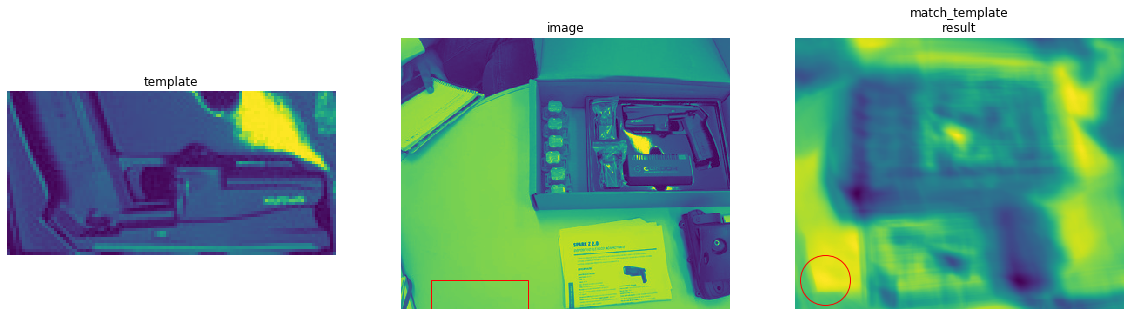

In [67]:
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('match_template\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=50)

plt.show()

In [3]:
porcent = 50
def define_dimensao(porcent, frame):
    try:
        (height, width, depth) = frame.shape
    except:
        (height, width) = frame.shape
    imgScale = porcent/100
    new_width,new_height = width*imgScale, height*imgScale
    return new_width,new_height

In [43]:
img = cv2.imread("./data/arma.jpg",0)
newX, newY = define_dimensao(porcent, img)
new_img = cv2.resize(img, (int(newX), int(newY)))
print(img.shape,new_img.shape)

56.0 28.0
(56, 112) (28, 56)


100 284 219 (219, 284)
0.6093209981918335 (105, 35) -0.049274928867816925 (154, 62) cv2.TM_CCOEFF_NORMED 100
0.9096319079399109 (105, 35) 0.7302413582801819 (45, 62) cv2.TM_CCORR_NORMED 100
0.8885049223899841 (216, 62) 0.18090617656707764 (105, 35) cv2.TM_SQDIFF_NORMED 100
0.9096319079399109 0.7302413582801819 3 100


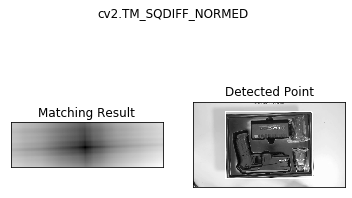

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_name="./data/14.png"
template_name="./data/bandeja.jpg"

img = cv2.imread(img_name,0)
img2 = img.copy()
template = cv2.imread(template_name,0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
#methods = ['cv2.TM_CCOEFF','cv2.TM_CCORR','cv2.TM_SQDIFF']
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED']
#scales=np.linspace ( 20 ,   110 ,   7 )
scales=[100]
found   =   None
for scale in scales:

    newX, newY = define_dimensao(scale, template)
    new_template = cv2.resize(template, (int(newX), int(newY)))
    w, h = new_template.shape[::-1]
    print(scale,w, h,new_template.shape)
        
    for meth in methods:
        img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,new_template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        # if we have found a new maximum correlation value, then update 
        # the bookkeeping variable 
        if   found  is   None   or   max_val   >   found [ 0 ] : 
            found   =   ( max_val ,   max_loc ,min_val ,min_loc ,  res, method, scale) 
        print(max_val ,   max_loc ,min_val ,min_loc , meth, scale)
        
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if found[5] in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      top_left = found[3]#min_loc
    else:
      top_left = found[1]#max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    print(found[0],found[2] ,found[5],found[6])   
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

(3, 28, 19)
(367, 489, 3) (349, 462) (19, 28, 3)
(array([ 69,  69,  69,  70,  70,  70,  70,  70,  71,  71,  71,  71,  71,
        72,  72,  72,  72,  72,  73,  73,  73,  89,  90,  90,  90,  90,
        91,  91,  91,  91,  92,  92,  92, 110, 110, 110, 111, 111, 111,
       112, 112, 112, 128, 128, 129, 129, 129, 129, 130, 130, 130, 131,
       148, 148, 148, 149, 149, 149, 150], dtype=int64), array([163, 164, 165, 162, 163, 164, 165, 166, 162, 163, 164, 165, 166,
       162, 163, 164, 165, 166, 163, 164, 165, 164, 163, 164, 165, 166,
       163, 164, 165, 166, 163, 164, 165, 164, 165, 166, 164, 165, 166,
       164, 165, 166, 161, 162, 160, 161, 162, 163, 161, 162, 163, 162,
       166, 167, 168, 166, 167, 168, 167], dtype=int64))


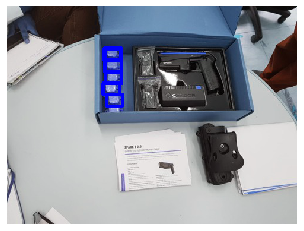

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('./data/kit1.jpg')
img_gray=img_rgb
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./data/cartucho.jpg')
print(template.shape[::-1])
_,w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(img_rgb.shape,res.shape,template.shape)
threshold = 0.7
loc = np.where( res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plot_image(img_rgb)
#cv2.imwrite('./data/res.png',img_rgb)